# Real Estate Trend Analysis Using Otodom Data

The dataset for this project was sourced from Otodom.pl, a leading real estate platform in Poland. It contains comprehensive information on property listings, including details on prices, locations, and more, making it a valuable asset for analyzing the Polish real estate market.


## Install the required python packages

In [ ]:
!pip install pandas
!pip install SQLAlchemy
!pip install "snowflake-connector-python[pandas]"
!pip install snowflake-sqlalchemy

## Library Imports:

In [1]:
import warnings
warnings.filterwarnings('ignore') #suprress warning message



import pandas as pd
from snowflake.sqlalchemy import URL
from sqlalchemy import create_engine
from snowflake.connector.pandas_tools import pd_writer
import matplotlib.pyplot as plt   #visualizing data
import time

## Connect to Snowflake and load data as pandas dataframe

In [2]:
# Establish a connection to a Snowflake data warehouse using the credentials
engine = create_engine(URL(
                    account = 'hrwnkma-yd18638',
                    user = 'ranjeet270',
                    password = 'Ranjeet@123',
                    database = 'demo',
                    schema = 'public',
                    warehouse = 'demo_wh'))

In [3]:
# Extract data 
start_time = time.time() 
with engine.connect() as conn:
    try:
        query = """ select * from OTODOM_DATA_TRANSFORMED """
        print("--- %s seconds ---" % (time.time() - start_time))
        
        df = pd.read_sql(query,conn)

        print(df.info())

    except Exception as e:
        print('--- Error --- ',e)
    finally:
        conn.close()
engine.dispose()

print("--- FINAL --- %s seconds ---" % (time.time() - start_time))

--- 1.3402578830718994 seconds ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62816 entries, 0 to 62815
Data columns (total 25 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   rn                      62816 non-null  int64  
 1   advertiser_type         62816 non-null  object 
 2   balcony_garden_terrace  62816 non-null  object 
 3   description             62816 non-null  object 
 4   heating                 62816 non-null  object 
 5   is_for_sale             62816 non-null  object 
 6   lighting                62816 non-null  object 
 7   location                62816 non-null  object 
 8   price                   62816 non-null  object 
 9   remote_support          62816 non-null  object 
 10  rent_sale               62816 non-null  object 
 11  surface                 62816 non-null  object 
 12  timestamp               62816 non-null  object 
 13  title                   62816 non-null  object 
 14  url

In [4]:
# view top 5 rows
df.head()

,rn,advertiser_type,balcony_garden_terrace,description,heating,is_for_sale,lighting,location,price,remote_support,...,form_of_property,no_of_rooms,parking_space,price_new,surface_new,suburb,city,country,title_eng,apartment_flag
0,7625,business,Balcony,Na sprzedaż :Mieszkanie 3 pokojowe znajdujące ...,urban,true,Ask,Longitude: 19.99764 | Latitude: 50.04055,"PLN 640,000.00",No,...,full ownership,3,garaż/miejsce parkingowe,640000.0,55.51,Widzew,Łódź,Polska,"2 premises with a place in the garage, large w...",apartment
1,7626,business,Balcony,Na sprzedaż :Mieszkanie 3 pokojowe znajdujące ...,urban,true,Ask,Longitude: 19.99049 | Latitude: 50.04242,"PLN 539,000.00",No,...,full ownership,3,Ask,539000.0,53.27,Rudniki,Gdańsk,Polska,"2 premises, 50 and 130m2, right next to S7",apartment
2,7627,business,Balcony,"ZAKUP BEZ PROWIZJI, BEZ PCC.MOŻLIWOŚĆ WEJŚCIA ...",urban,true,Ask,Longitude: 20.01051 | Latitude: 50.10012,"PLN 572,626.00",No,...,full ownership,3,garaż/miejsce parkingowe,572626.0,64.34,None,None,None,None,apartment
3,7628,business,Balcony,Do wynajęcia od 01.01.2023Mieszkanie 3-pokojow...,urban,false,Ask,Longitude: 19.9316234 | Latitude: 50.0345805,"PLN 3,500.00",No,...,None,3,garaż/miejsce parkingowe,3500.0,52.00,None,None,None,None,apartment
4,7629,business,Balcony,Kraków – Łagiewniki - ul. Cegielniana –\r\n\r\...,gas,true,Ask,Longitude: 19.9321817 | Latitude: 50.0269675,"PLN 1,400,000.00",No,...,full ownership,3,garaż/miejsce parkingowe,1400000.0,123.40,None,None,None,None,apartment


In [5]:
# get shape info
df.shape

(62816, 25)

# Data Cleaning


## Check for null values

In [6]:
df.isnull().sum()

rn                            0
advertiser_type               0
balcony_garden_terrace        0
description                   0
heating                       0
is_for_sale                   0
lighting                      0
location                      0
price                         0
remote_support                0
rent_sale                     0
surface                       0
timestamp                     0
title                         0
url                           0
form_of_property          28453
no_of_rooms                5516
parking_space                 0
price_new                     0
surface_new                   0
suburb                    45301
city                      43576
country                   45389
title_eng                 43576
apartment_flag                0
dtype: int64

In [7]:
df.describe(include = 'object')

,advertiser_type,balcony_garden_terrace,description,heating,is_for_sale,lighting,location,price,remote_support,rent_sale,...,title,url,form_of_property,no_of_rooms,parking_space,suburb,city,country,title_eng,apartment_flag
count,62816,62816,62816,62816,62816,62816,62816,62816,62816,62816,...,62816,62816,34363,57300,62816,17515,19240,17427,19240,62816
unique,2,2,59353,9,2,3,30575,16707,2,1639,...,52797,62816,4,10,4,163,6,1,12888,1
top,business,Balcony,Inwestycja Apartamenty Czeremchowa to nowoczes...,urban,true,Ask,Longitude: 17.044666049486 | Latitude: 51.0983...,"PLN 3,000.00",No,No,...,Apartamenty Czeremchowa! kawalerka z tarasem!,https://www.otodom.pl/pl/oferta/mieszkanie-na-...,full ownership,2,Ask,Wola,Warszawa,Polska,Czeremchów apartments A studio apartment with ...,apartment
freq,56531,31586,126,28560,49786,62653,390,637,55964,38385,...,120,1,31044,20734,32805,820,6032,17427,120,62816


In [8]:
# check unique in every column
for col in df.describe(include = 'object').columns:
    print(col)
    print(df[col].unique())
    print('-'*70)

advertiser_type
['business' 'private']
----------------------------------------------------------------------
balcony_garden_terrace
['Balcony' 'Ask']
----------------------------------------------------------------------
description
['Na sprzedaż :Mieszkanie 3 pokojowe znajdujące się na 2 piętrze o powierzchni 55,51m2.Mieszkanie składa się z :-Salon z aneksem kuchennym-Sypialnia 2x-Łazienka-PrzedpokójTermin realizacji inwestycji - IV Kwartał 2022rMieszkanie oddawane w stanie deweloperskimIstnieje możliwość wykończenia mieszkania pod klucz!Do mieszkania przynależy miejsce postojowe - dodatkowo płatne 35 000 zł.LOKALIZACJAInwestycja znajduje się w sąsiedztwie Pętli Mały Płaszów. Dogodny dojazd do centrum zapewnia rozbudowana komunikacja miejska:- autobusy dzienne i nocne- szybki tramwajOsiedle jest znakomicie połączone z krakowskim systemem ścieżek rowerowych i pozostałymi dzielnicami Krakowa. Trasa rowerowa znajduje się tuż pod blokiem.Po więcej informacji zapraszam do kontaktu:Patryk7

In [9]:
# fill null values in country colum with Poland as this data for only one country
df['country'].fillna('Polska',inplace = True) 

In [10]:
unique_values = df['country'].unique()
unique_values


array(['Polska'], dtype=object)

In [11]:
#drop columns of no longer informative.
df.drop(['form_of_property'],axis =1,inplace = True)
df.isnull().sum()
#removing rows with null values(significantly small)
df.dropna(inplace = True)

In [12]:
df.shape

(16078, 24)

# Exploratory Data Analysis

## Average rent of 1 Room,2 room,3 room & 4 Room Apartments in Various cities

       city  avg_rent_1r  avg_rent_2r  avg_rent_3r  avg_rent_4r
0    Gdańsk      2314.59      3362.05      5262.89     10848.21
1      Łódź      2563.21      3272.56      5954.77      9983.33
2  Warszawa      2572.76      3493.60      5139.90      9542.54
3    Kraków      2563.36      3273.96      5372.59      9045.47
4   Wrocław      2272.53      3406.41      4651.82      8517.14


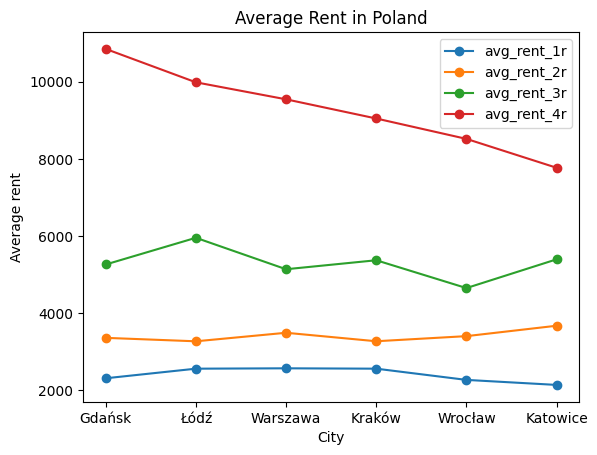

In [13]:
with engine.connect() as conn:
    try:
        query =  """ SELECT city,
                            ROUND(AVG(CASE WHEN no_of_rooms = 1 THEN price_new END), 2) as avg_rent_1R,
                            ROUND(AVG(CASE WHEN no_of_rooms = 2 THEN price_new END), 2) as avg_rent_2R,
                            ROUND(AVG(CASE WHEN no_of_rooms = 3 THEN price_new END), 2) as avg_rent_3R,
                            ROUND(AVG(CASE WHEN no_of_rooms = 4 THEN price_new END), 2) as avg_rent_4R
                     FROM otodom_data_transformed
                     WHERE city IN ('Warszawa', 'Wrocław', 'Kraków', 'Gdańsk', 'Katowice', 'Łódź')
                     AND apartment_flag = 'apartment'
                     AND lower(is_for_sale) = 'false'
                     AND no_of_rooms IN (1, 2, 3, 4)
                     GROUP BY city
                     ORDER BY avg_rent_4R DESC;  """
        
        df = pd.read_sql(query,conn)
        print(df.head())

        df.plot(x="city", y=["avg_rent_1r","avg_rent_2r","avg_rent_3r","avg_rent_4r"]
                      ,  title="Average Rent in Poland", xlabel='City', ylabel='Average rent',marker = 'o');

    except Exception as e:
        print('--- Error --- ',e)
    finally:
        conn.close()
engine.dispose()

## Average Sale Price of Apartments in Various cities:

       city       avg_sale
0  Katowice  944861.238105
1   Wrocław  876741.010006
2    Kraków  859512.698796
3  Warszawa  851366.006160
4    Gdańsk  843257.525701


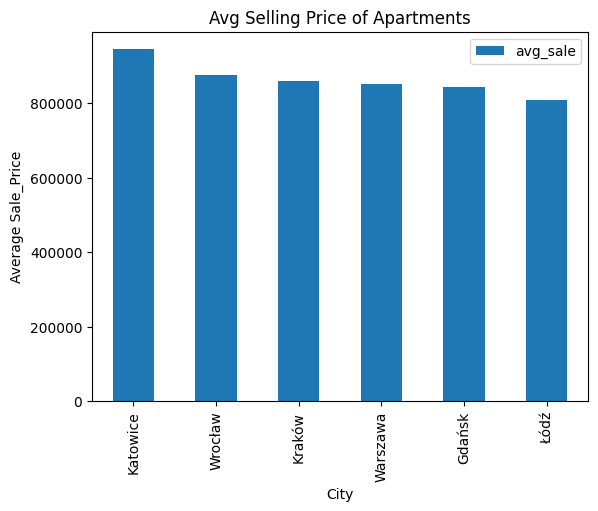

In [14]:
with engine.connect() as conn:
    try:
        query = """ WITH cte AS (
                                SELECT city, is_for_sale, AVG(price_new) as avg_sale
                                FROM otodom_data_transformed
                                WHERE city IN ('Warszawa', 'Wrocław', 'Kraków', 'Gdańsk', 'Katowice', 'Łódź')
                                AND apartment_flag = 'apartment'
                                GROUP BY city, is_for_sale
                                )
                                SELECT city, MAX(avg_sale) as avg_sale
                                FROM cte
                                WHERE is_for_sale = 'true'
                                GROUP BY city
                                ORDER BY avg_sale DESC;  """
        
        df = pd.read_sql(query,conn)
        print(df.head())

        df.plot.bar(x="city", y="avg_sale"
                      ,  title="Avg Selling Price of Apartments", xlabel='City', ylabel='Average Sale_Price');
        
    except Exception as e:
        print('--- Error --- ',e)
    finally:
        conn.close()
engine.dispose()

## Average Rent of Apartment in Warszawa based on surface Area:

           suburb  avg_price_upto_50  avg_price_upto_100  avg_price_over_100
0          Bemowo            2425.70             5403.08            14277.41
1       Białołęka            2656.98             4769.33            12927.29
2         Bielany            2902.58             4890.18            11019.50
3         Mokotów            2516.77             5468.78            12763.08
4  Praga-Południe            3036.89             4916.88            13760.11


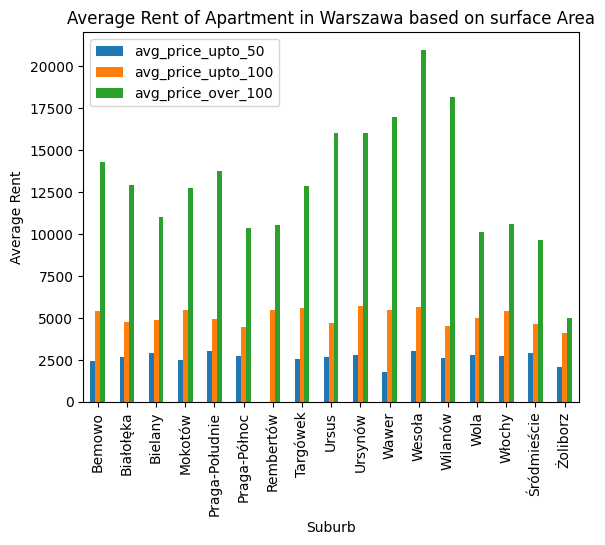

In [15]:
with engine.connect() as conn:
    try:
        query = """ WITH cte AS (
                                SELECT suburb,
                                       CASE
                                           WHEN surface_new BETWEEN 0 AND 50 THEN '0-50'
                                           WHEN surface_new BETWEEN 50 AND 100 THEN '50-100'
                                           ELSE '>100'
                                       END AS area_category,
                                       AVG(CASE WHEN lower(is_for_sale) = 'false' THEN price_new ELSE NULL END) AS avg_price
                                FROM otodom_data_transformed
                                WHERE city = 'Warszawa'
                                      AND apartment_flag = 'apartment'
                                      AND suburb IS NOT NULL
                                GROUP BY suburb, area_category
                                )
                                SELECT suburb,
                                       ROUND(MAX(CASE WHEN area_category = '0-50' THEN avg_price END), 2) AS avg_price_upto_50,
                                       ROUND(MAX(CASE WHEN area_category = '50-100' THEN avg_price END), 2) AS avg_price_upto_100,
                                       ROUND(MAX(CASE WHEN area_category = '>100' THEN avg_price END), 2) AS avg_price_over_100
                                FROM cte
                                GROUP BY suburb
                                ORDER BY suburb;  """


        df = pd.read_sql(query,conn)
        print(df.head())
        
        df.plot.bar(x="suburb", y=["avg_price_upto_50","avg_price_upto_100","avg_price_over_100"]
                      ,title="Average Rent of Apartment in Warszawa based on surface Area", xlabel='Suburb', ylabel='Average Rent');

        #plt.show();

    except Exception as e:
        print('--- Error --- ',e)
    finally:
        conn.close()
engine.dispose()

## Average Area by City in Price range between 3000 and 4000:

       city  avg_area
0    Kraków     51.95
1   Wrocław     52.96
2    Gdańsk     53.45
3      Łódź     53.63
4  Warszawa     54.42


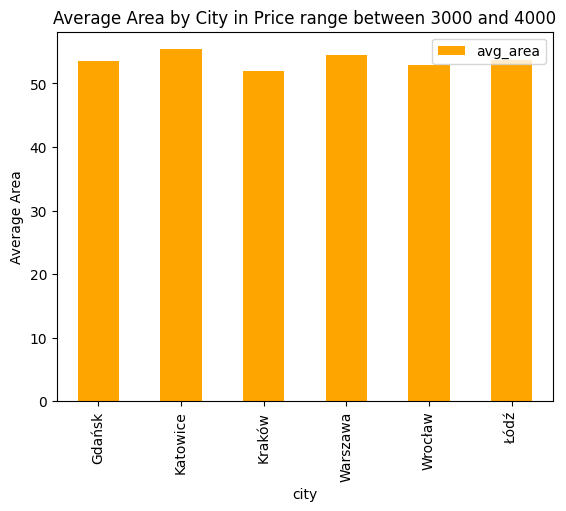

In [16]:
with engine.connect() as conn:
    try:
        query = """ SELECT city, 
                           ROUND(AVG(surface_new), 2) AS avg_area
                    FROM otodom_data_transformed
                    WHERE city IN ('Warszawa', 'Wrocław', 'Kraków', 'Gdańsk', 'Katowice', 'Łódź')
                    AND apartment_flag = 'apartment'
                    AND lower(is_for_sale) = 'false'
                    AND price_new BETWEEN 3000 AND 4000
                    GROUP BY city
                    ORDER BY avg_area;
 """
        
        df = pd.read_sql(query,conn)
        print(df.head())

        # Create a DataFrame pivot table with "city" as the index and "avg_area" as values
        pivot_table = df.pivot_table(index="city", values="avg_area")
        
        # Create a stacked bar chart
        pivot_table.plot(kind="bar", stacked=True, color='orange')
        
        # Set the title
        plt.title("Average Area by City in Price range between 3000 and 4000")
        
        # Set the y-axis label
        plt.ylabel("Average Area")
        
        # Display the stacked bar chart
        plt.show()

    except Exception as e:
        print('--- Error --- ',e)
    finally:
        conn.close()
engine.dispose()

## Percentage of Private & Business Ads on Otodom

  business_ads_perc private_ads_perc
0            89.99%           10.01%


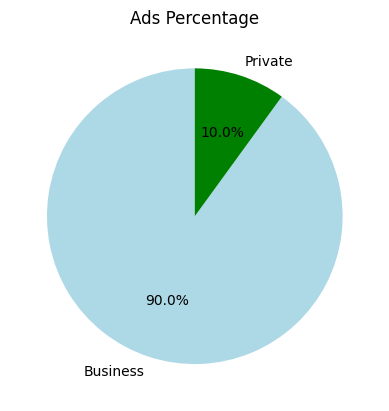

In [17]:
with engine.connect() as conn:
    try:
        query = """ WITH ads_data AS (
                        SELECT
                        advertiser_type,
                        COUNT(1) AS ads_count
                        FROM otodom_data_transformed
                        GROUP BY advertiser_type)
                        SELECT
                        CONCAT(ROUND(100 * SUM(CASE WHEN advertiser_type = 'business' THEN ads_count ELSE 0 END) / SUM(ads_count), 2), '%') AS business_ads_perc,
                        CONCAT(ROUND(100 * SUM(CASE WHEN advertiser_type = 'private' THEN ads_count ELSE 0 END) / SUM(ads_count), 2), '%') AS private_ads_perc
                        FROM ads_data;  """
                                
        df = pd.read_sql(query,conn)
        print(df.head())

        pie_data = df[["business_ads_perc", "private_ads_perc"]].replace('%', '', regex=True).astype(float)
        
        pie_data.sum().plot.pie(autopct='%1.1f%%', startangle=90, colors=['lightblue', 'green'], labels=['Business','Private'] )
        plt.title("Ads Percentage")
        
        plt.show();

    except Exception as e:
        print('--- Error --- ',e)
    finally:
        conn.close()
engine.dispose()

## Top 3 most Luxurious Neighborhoods in Warsaw

           suburb  luxurious_apartments
0         Mokotów                    34
1            Wola                    27
2  Praga-Południe                    23


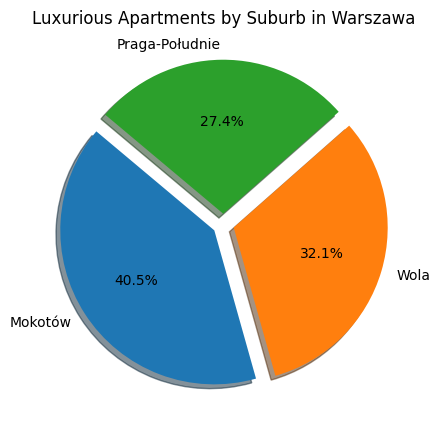

In [18]:
with engine.connect() as conn:
    try:
        query = """WITH suburb_counts AS (
                            SELECT suburb, COUNT(1) AS luxurious_apartments
                            FROM otodom_data_transformed
                            WHERE city = 'Warszawa'
                            AND apartment_flag = 'apartment'
                            AND lower(is_for_sale) = 'true'
                            AND price_new > 2000000
                            AND suburb IS NOT NULL
                            GROUP BY suburb
                            )  
                            SELECT suburb, luxurious_apartments
                            FROM (
                                SELECT *,
                                RANK() OVER (ORDER BY luxurious_apartments DESC) AS rn
                                FROM suburb_counts) x
                            WHERE rn <= 3; """
        
        df = pd.read_sql(query,conn)
        print(df.head())

        
        # Create data for the pie chart
        labels = df["suburb"]
        sizes = df["luxurious_apartments"]
        explode = (0.07, 0.07, 0.07)  # Adjust the values to control the explosion effect
        
        # Create a pie chart with the "explode" effect
        plt.figure(figsize=(5,5))  # Adjust the figure size as needed
        plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140, explode=explode, shadow=True)
        
        # Set the title
        plt.title("Luxurious Apartments by Suburb in Warszawa")
       
        plt.show();

    except Exception as e:
        print('--- Error --- ',e)
    finally:
        conn.close()
engine.dispose()

## Most Expensive Apartments and its Details:

In [19]:
with engine.connect() as conn:
    try:
        query = """WITH max_price_cte AS (
                            SELECT city, max(price_new) AS max_price
                            FROM otodom_data_transformed
                            WHERE city IN ('Warszawa', 'Wrocław', 'Kraków', 'Gdańsk', 'Katowice', 'Łódź')
                            AND apartment_flag = 'apartment'
                            AND lower(is_for_sale) = 'true'
                            GROUP BY city
                            )
                            SELECT ot.rn, ot.title_eng, ot.city, ot.suburb, ot.price_new, ot.surface_new, ot.url
                            FROM otodom_data_transformed ot
                            JOIN max_price_cte mpc ON ot.city = mpc.city
                            AND ot.price_new = mpc.max_price
                            WHERE ot.apartment_flag = 'apartment'
                            AND lower(ot.is_for_sale) = 'true'
                            ORDER BY ot.city, ot.price_new; """
        
        df = pd.read_sql(query,conn)
        print(df.head())

    except Exception as e:
        print('--- Error --- ',e)
    finally:
        conn.close()
engine.dispose()

      rn                                          title_eng      city  \
0  17554  2-room apartment 43m2 + balcony without commis...    Gdańsk   
1  17151  2-room apartment 42m2 + loggia without commission  Katowice   
2  55968       Apartment in a representative tenement house    Kraków   
3  55351            Delux apartment in the heart of Powiśle  Warszawa   
4  23767  2pok schedule, view of the park, Biskupin, nea...   Wrocław   

                  suburb   price_new  surface_new  \
0  Ujeścisko - Łostowice  11000000.0        274.0   
1               Koszutka  17720000.0        226.0   
2             Grzegórzki  16000000.0        560.0   
3                 Wesoła  20000000.0        577.0   
4               Biskupin  15000000.0        350.0   

                                                 url  
0  https://www.otodom.pl/pl/oferta/apartament-na-...  
1  https://www.otodom.pl/pl/oferta/apartament-for...  
2  https://www.otodom.pl/pl/oferta/ultra-nowoczes...  
3  https://www.otodom.

# Conclusion:
The analysis indicates that apartment prices in Polish cities generally rise with larger surface areas, with Warszawa leading in both rental and sale prices. A notable finding is that the majority of listings are posted by businesses rather than private sellers. In Warszawa, the suburbs of Mokotów, Śródmieście, and Wilanów stand out as prime locations for luxury apartments, with prices exceeding 2 million PLN.